## Decision Tree
- 의사결정트리라고 표현할 수 있음
- Classification, Regression 모두 가능한 지도 학습 모델
- 조건 분기에 따라 데이터를 분류
  - 한 분기 마다 두 개의 변수 영역으로 구분
  - 첫 부류 기준: **Root Node**
  - 중간 마디: **Intermediate Node**
  - 끝 마디:**Terminal Node** 또는 **Leaf Node**
- 데이터를 나눌 수 있는 조건을 추가해 분류 정확도를 높임


### Practice
- Using **`pandas`** library
- Read URL of CSV file
- Using **`head()`**
- Using **`.info()`**
- Using **`.describe()`**
- Import `sklearn.model_selection`
  - Using **`train_test_split()`**
- Import `sklearn.preprocessing`
  - Using **`StandardScaler()`**
- Import `sklearn.linear_model`
  - Using **`LogisticRegression()`**
- Visualize Decision Tree
  - Using **`plot_tree()`**
- Import `matplotlib.pyplot`
  - Using properties
- Learning Structure of Decision Tree
- Import `sklearn.tree`
  - Using **DecisionTreeClassifier()**
- Check a feature importances
- Evaluating Decision Tree Learning Data and Performance

### 1. prepare to Numerical data
- 결정 트리 활용을 위해 데이터 셋 준비

### 1-1. Import pandas library
- Using **`pd.read_csv()`**

In [ ]:
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine_csv_data")

### 1-2. Check a data
- Using **`head()`**: 첫 5개의 샘플 데이터 확인

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


### 1-3. Check for missing types and data
- Using **`head()`**: 데이터프레임의 각 열의 데이터 타입과 누락 데이터가 있는지 확인
  - RangeIndex: 총 샘플의 개수 중 모두 **`Non-Null`** 값이 반환되면 누락된 것은 없는 것

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


### 1-4. View brief statistics for columns
- Using **`describe`**: 데이터프레임의 각 열의 수치형 데이터의 통계값 제공
  - 개수(count)
  - 평균(mean)
  - 표준편차(standard devaition)
  - 최소(minimum)
  - 사분위수(quartile): 데이터를 순차적으로 4등분 한 값
   - 1사분위수(1-quartile)
    - 2사분위수(median-quartile) / **중앙값이므로 중앙사분위라고도 표현 가능**
    - 3사분위수(3-quartile)
  - 최대(maximum)

In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### 2. Create numpy data-set
- create input
- create target

In [ ]:
data = wine[["alcohol", "sugar", "pH"]].to_numpy() #features

target = wine["class"].to_numpy() #target

#Checkout
print(data[:10])
print(target[:10])

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 [ 9.8   1.9   3.16]
 [ 9.4   1.9   3.51]
 [ 9.4   1.8   3.51]
 [ 9.4   1.6   3.3 ]
 [10.    1.2   3.39]
 [ 9.5   2.    3.36]
 [10.5   6.1   3.35]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 3. Create Train-set and Test-set to using **`train_test_split()`**
- 입력과 타겟 데이터 준비
- Train-set, Test-set 생성
  - **`test_size=`**
    - Train-set : Test-set 비율을 조정
    - 샘플의 양에 따라 조정이 필요한 경우가 있기 때문
    - **`test_size=0.25(default)`**
      - 75 : 25의 비율로 분할
    - **`test_size=0.20`**
      - 80 : 20의 비율로 분할

In [ ]:
from sklearn.model_selection import train_test_split

#setting test_size=value
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

#Checkout
print(train_input)
print(train_target)

[[10.5   7.7   3.19]
 [12.4   2.1   3.26]
 [11.8   2.1   3.41]
 ...
 [ 9.5   5.6   3.24]
 [ 9.5   8.    3.18]
 [ 9.5   2.7   3.51]]
[1. 0. 0. ... 1. 1. 0.]


### 3-1. Check model shape
- 훈련 데이터의 샘플 개수
- 테스트 데이터의 샘플 개수

In [ ]:
#Checkout model.shape
print(train_input.shape)
print(test_input.shape)

(5197, 3)
(1300, 3)


### 4. Using **`StandardScaler()`**
- **`StandardScaler()`** 활용하여 데이터 전처리
- Import `sklearn.preprocessing`

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#Checkout
print("train_scaled\n", train_scaled)
print("test_scaled\n", test_scaled)

train_scaled
 [[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]
test_scaled
 [[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 ...
 [ 1.60871671 -0.76554908 -0.16888369]
 [-0.90962693  0.88161523  0.52028568]
 [-1.49724045  2.09092573 -1.98578474]]


### 5. Using LogisticRegression
- Import `skearn.linear_model`
- Using **`LogisticRegression()`**

In [ ]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

#Check scores
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


### 5-1. Check coefficiant&intercept
- 계수와 절편의 값을 확인

In [ ]:
#Check coefficiant, intercept
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


### 6. Using DecisionTree
- 계수와 절편을 확인하는 것만으로 회귀 모델을 이해하기 어려움
  - 다항 특성이 추가된다면 더 어려운 추측을 할 수 밖에 없음
- 해당 계수와 절편의 값이 어떻게 도출되었는지 시각적으로 확인해야함
- 결정트리(DecisionTree)를 활용하여 이에 대한 윤곽을 들여다 볼 수 있음


In [ ]:
#import DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Check scores
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


### 6-2. Visualize Decision Tree
- Using **`plot_tree()`**: 결정트리 모델 시각화
- Import `matplotlib.pyplot`
- Using properties
  - **`plt.figure()`**: figure 생성을 할 수 있는 함수
  - **`figsize=(2n,2n)`**: 2배수 크기로 x,y 값을 지정하면 해당 크기로 figure 생성

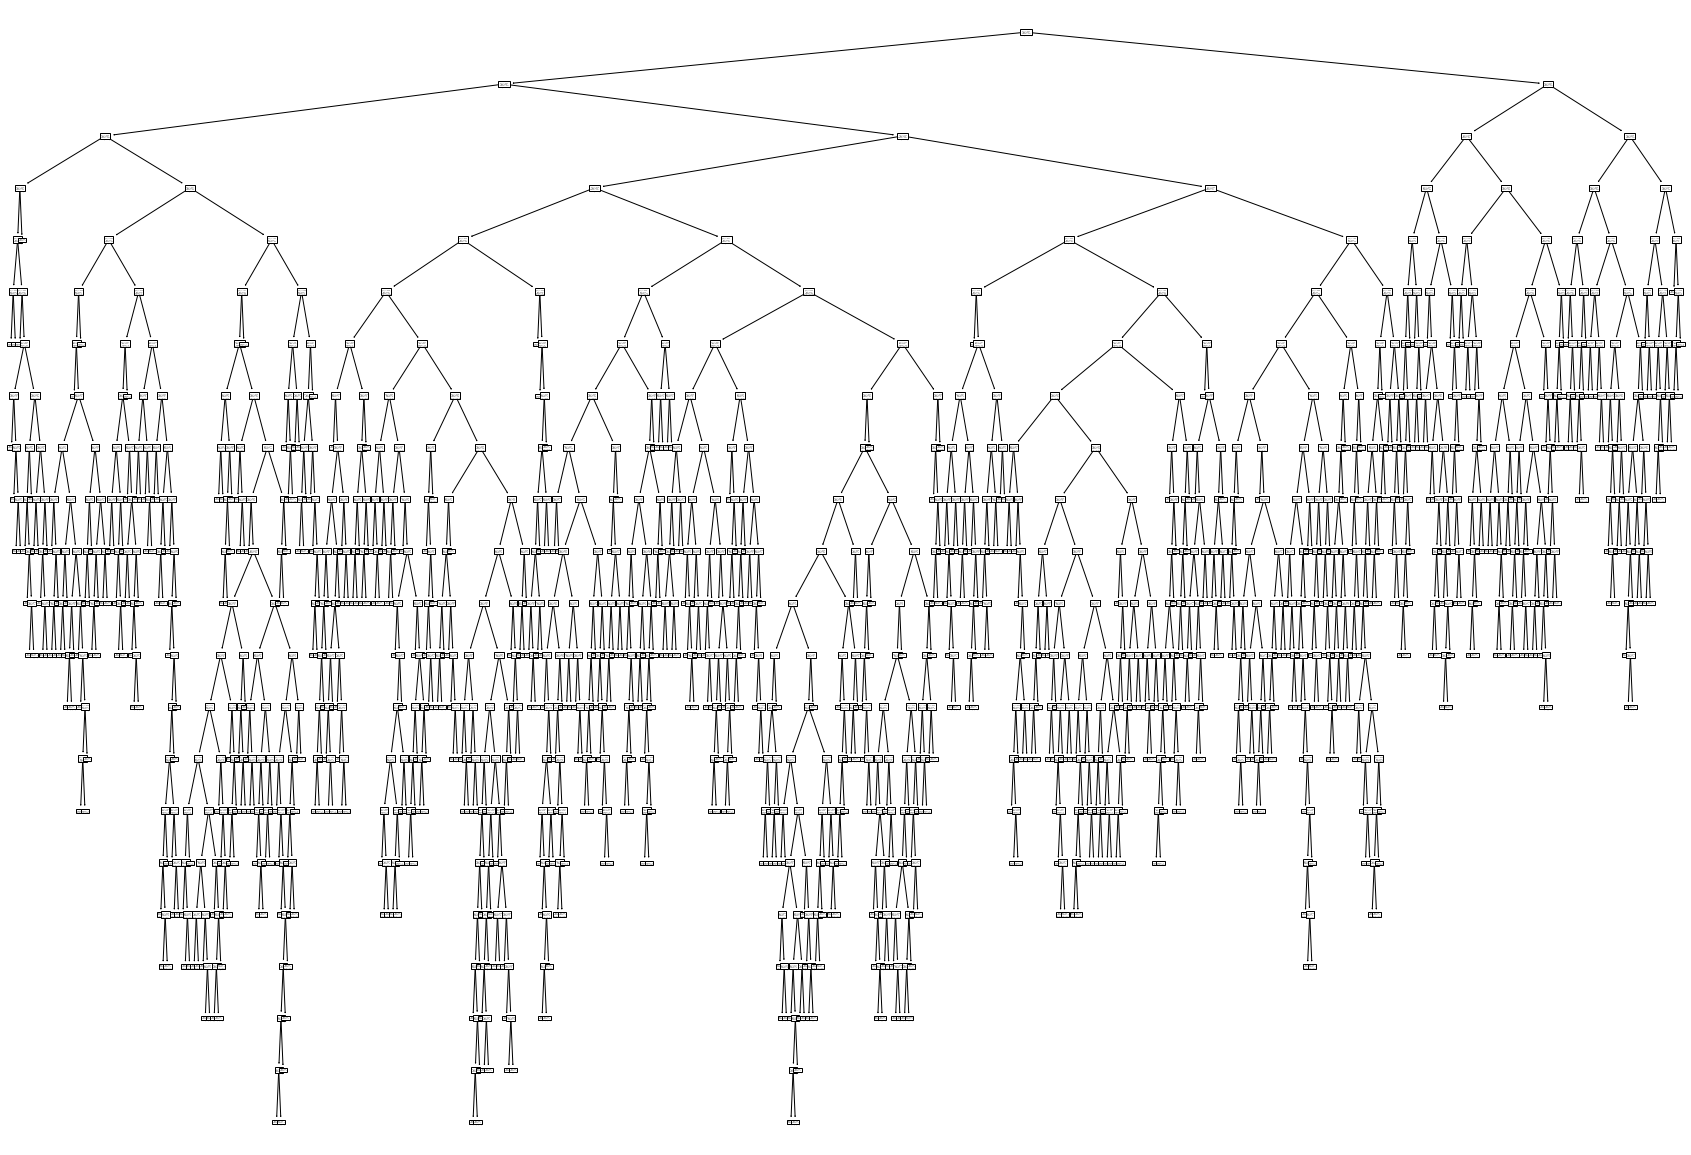

In [ ]:
#Draw a DecisionTree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30,21))
plot_tree(dt)
plt.show()

### 6-3. Learning Structure of Decision Tree
- Using **`plot_tree()`**
  - Using properties
    - **`max_depth=`**: 루트 노드를 제외한 결정트리의 촤대 깊이 지정
    - **`filled=`**: 클래스 비율에 따른 배경색을 노드에 적용 여부
    - **`feature_names=`**: 특성 라벨 지정

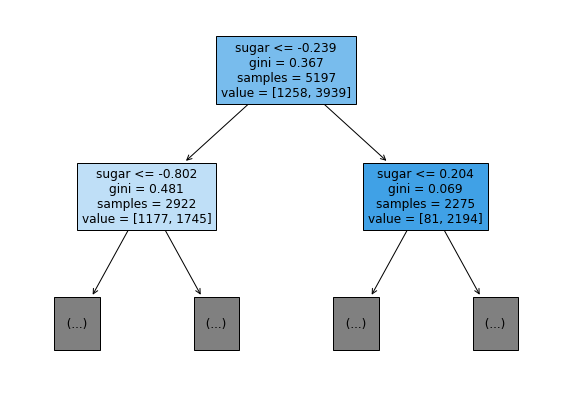

In [ ]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

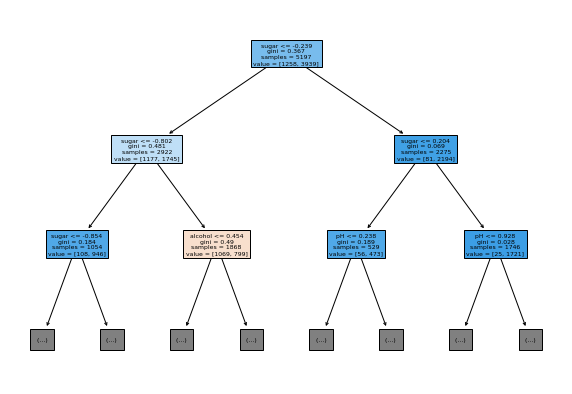

In [ ]:
#max_depth value changed
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=2, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

### 6-4. Tree pruning
- 무한정 결정트리가 성장하면 과대적합이 발생할 여지가 있음
- 어느정도 성장했다고 판단하면 가지치기를 수행
- Import `sklearn.tree`
- Using **DecisionTreeClassifier()**


In [ ]:
#Tree pruning
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

#Checkout
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


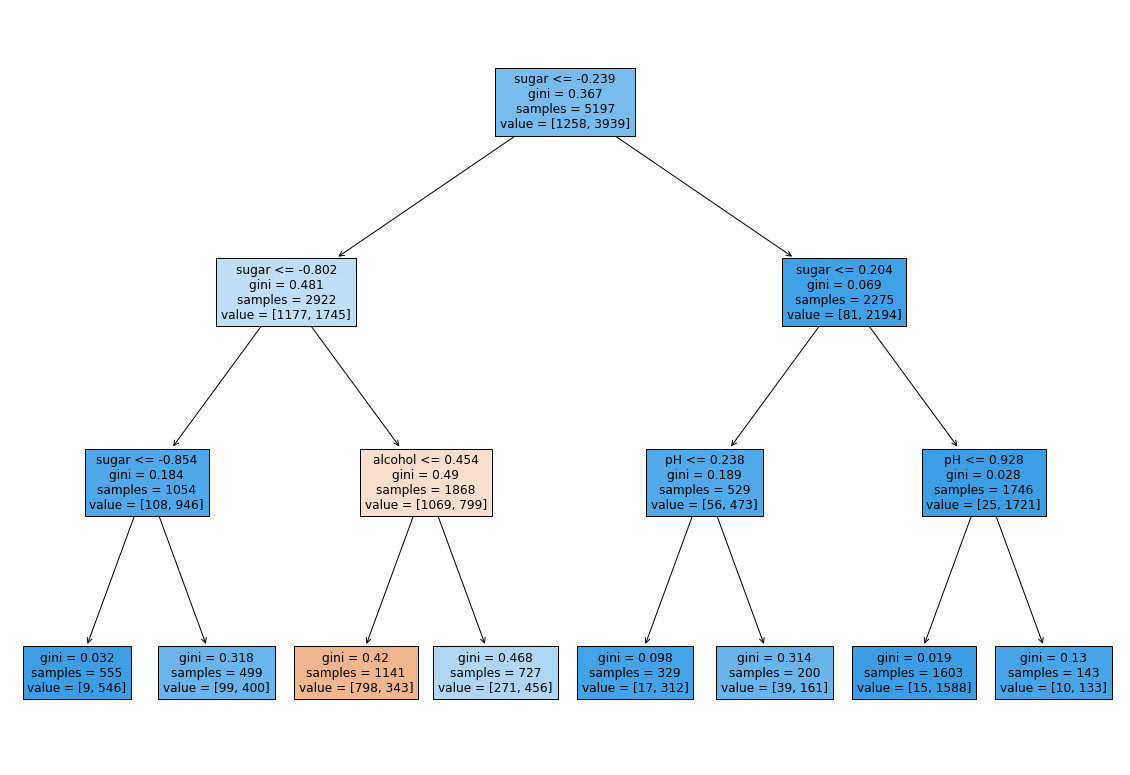

In [ ]:
#Checkout Tree pruning
plt.figure(figsize=(20, 14))
plot_tree(dt, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

- **지니 계수(Gini-index)**
  - 통계적 분산 정도를 정량화해서 표현한 값, 0과 1사이의 값을 가짐
  - 지니계수가 높을수록 잘 분류되지 못한 것
  - 반대로 지니계수가 낮을수록 잘 분류되었다고 볼 수 있음
- **정보이득(Information gain)**
  - very impure -> impure -> pure 순서로 수치의 합을 계산
  - 특성 중요도를 결정 짓는 중요한 수치
- 불순도(impurity)
 - 클래스가 섞이지 않고 분류가 잘 되었다면, 불순도는 낮음 
 - 반면 클래스가 섞여 있고, 반반인 경우에는, 불순도가 높음 
 - **결정트리 모델은 이 불순도가 낮아지는 방향으로 학습**
- **엔트로피 불순도(Entropy impurity)**
  - 특정 변수를 사용했을 때 엔트로피의 감소량
  - $-{x_1}𝗑\log_2{x_2}-{x_2}𝗑\log_2{x_1}$
  - $x_1$:음성클래스[0]의 비율
  - $x_2$:양성클래스[1]의 비율

### 6-5. Check a feature importances
- **feature_imortances: 특성 중요도**
  - 각 feature 중 어떤 feature가 결정 조건을 짓는데 중요도가 높은가에 대한 수치 반환
  - 특성에 대한 분기 노드의 특성 중요도의 합 / 전체 분기 노드의 특성 중요도의 총합
  - 데이터를 작게 분해할 수록 더 높은 수치가 반환, 단, 작게 분해하는 것이 무조건 좋은 분류라고 말하기는 어려움 

In [ ]:
print(dt.feature_importances_) #[alcohol, sugar, pH]

[0.12345626 0.86862934 0.0079144 ]


### 7. Evaluating Decision Tree Learning Data and Performance
- StandardScaler를 활용해 데이터 전처리를 하지 않이도 같은 정확도를 반환한다는 것을 알 수 있음
- 특성의 크기는 결정트리 모델의 성능에 영향을 주지 않기 때문에 전처리 과정이 필요없음

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

#Checkout
print(dt.score(train_scaled, train_target)) #preprocessing
print(dt.score(test_scaled, test_target)) #Npreprocessing

0.8454877814123533
0.8415384615384616


In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

#Checkout
print(dt.score(train_input, train_target)) #Non-preprocessing
print(dt.score(test_input, test_target)) #Non-preprocessing

0.8454877814123533
0.8415384615384616
